## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

Dataset Description and Variable Selection:

For this analysis, I have selected a small set of variables from the General Social Survey (GSS) to explore correlations between demographic factors and job satisfaction. The GSS is a well-established, nationally representative dataset that has been widely used in social science research to track societal trends, attitudes, and behaviors over time. Its extensive data collection allows for robust analysis of various social and economic factors, making it an ideal resource for examining workplace satisfaction and its potential demographic influences.

These are the specific variables I have chosen for my study:

age – Respondent’s age, which may indicate generational differences in job satisfaction or how workplace contentment evolves over the course of a career.

sex – Respondent’s gender, allowing for an exploration of potential disparities in job satisfaction between men and women.

race – Respondent’s racial identity, which may reveal differences in workplace experiences across racial groups.

marital – Marital status, which could provide insight into how family life and relationship status relate to job satisfaction.

jobsat – Respondent’s reported level of job satisfaction, serving as the key dependent variable in this analysis.

These variables were selected to investigate potential relationships between demographic characteristics and job satisfaction. By analyzing JOBSAT in relation to age, gender, race, and marital status, I aim to assess whether and how these factors contribute to variations in workplace contentment. Prior research has shown that demographic factors can influence job satisfaction through mechanisms such as workplace discrimination, work-life balance, career progression opportunities, and social support systems. Exploring these relationships within the GSS dataset may help identify broader patterns and contribute to a deeper understanding of workforce dynamics.

The next steps in this study involve data preparation, starting with loading and cleaning the dataset to handle any missing or inconsistent values. Following this, I will conduct exploratory data analysis (EDA) to examine the distributions of each variable, identify potential outliers, and detect preliminary trends or associations. Visualizing and summarizing the data at this stage will provide a clearer foundation for subsequent statistical analysis, allowing for more informed hypotheses and interpretations. Depending on the initial findings, further statistical techniques such as correlation analysis, regression modeling, or subgroup comparisons can be applied to better understand the factors influencing job satisfaction.

By leveraging the rich and representative nature of the GSS dataset, this analysis seeks to contribute to discussions on workplace equity, employee well-being, and broader social trends affecting job satisfaction.



  age     sex   race        marital             jobsat
0  23  FEMALE  White  Never married  .i:  Inapplicable
1  70    MALE  White        Married  .i:  Inapplicable
2  48  FEMALE  White        Married  .i:  Inapplicable
3  27  FEMALE  White        Married  .i:  Inapplicable
4  61  FEMALE  White        Married  .i:  Inapplicable
                 age     sex   race  marital             jobsat
count   71212.000000   71212  71212    71212              71212
unique           NaN       5      4        8                 11
top              NaN  FEMALE  White  Married  .i:  Inapplicable
freq             NaN   39620  56795    37173              64190
mean       46.312209     NaN    NaN      NaN                NaN
std        17.353604     NaN    NaN      NaN                NaN
min        18.000000     NaN    NaN      NaN                NaN
25%        32.000000     NaN    NaN      NaN                NaN
50%        44.000000     NaN    NaN      NaN                NaN
75%        60.000000     NaN  

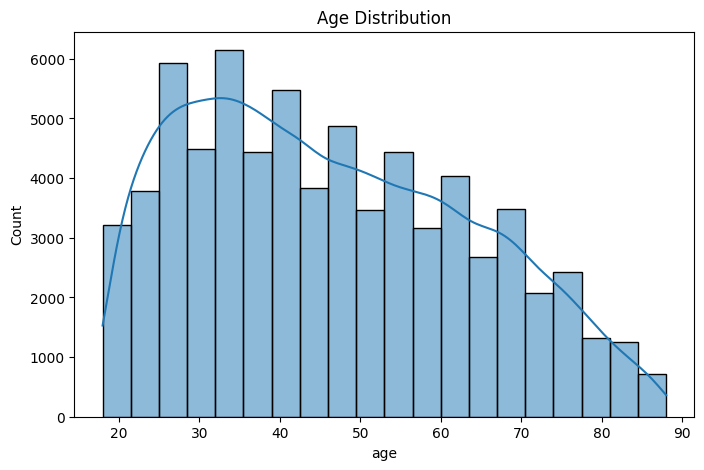

<ipython-input-9-1e6e92448c0f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='coolwarm')


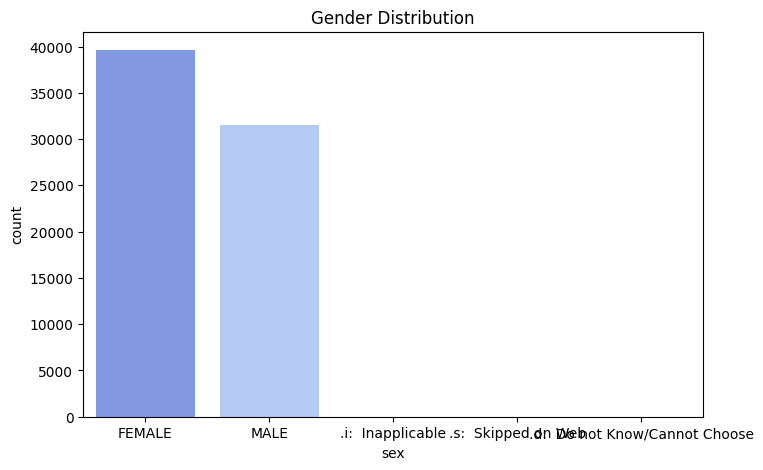

<ipython-input-9-1e6e92448c0f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='race', palette='viridis')


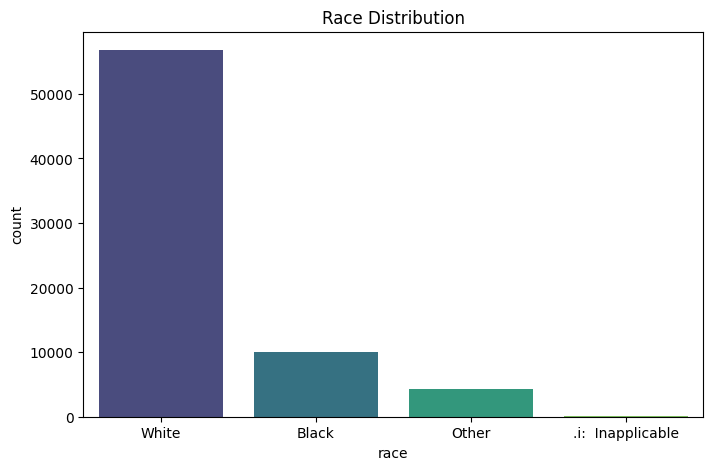

<ipython-input-9-1e6e92448c0f>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital', palette='magma')


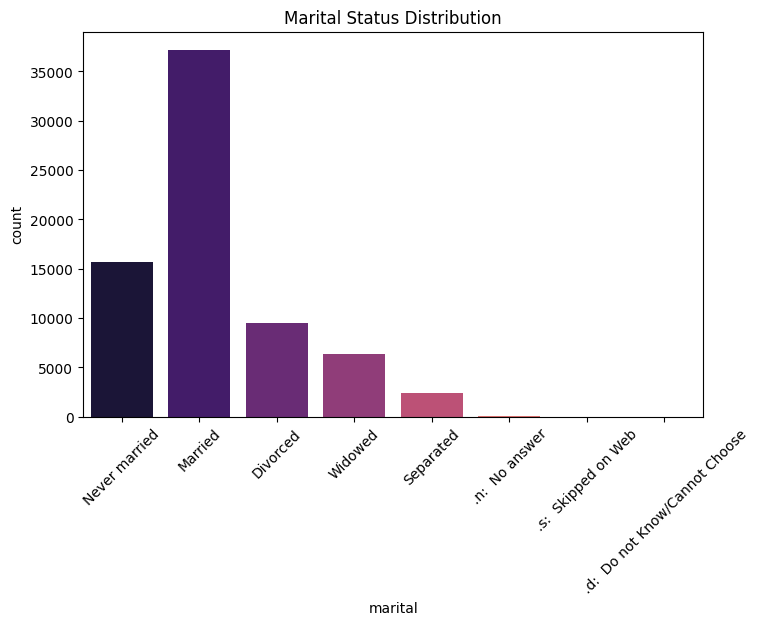

<ipython-input-9-1e6e92448c0f>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='jobsat', palette='pastel')


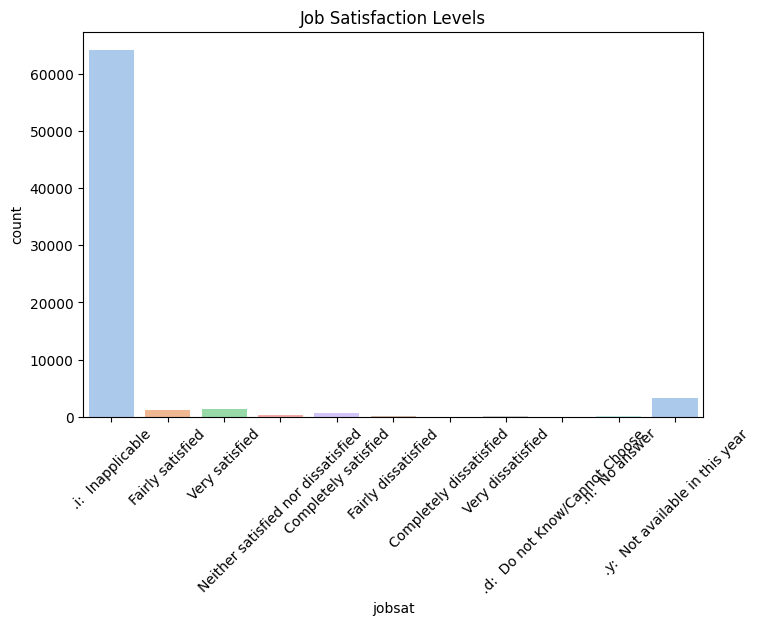

In [ ]:
# Load the dataset using pd.read_excel
df = pd.read_excel('/content/gss_data/result/GSS.xlsx') # Use pd.read_excel instead of pd.read_csv

# Select relevant columns
columns = ['age', 'sex', 'race', 'marital', 'jobsat']
df = df[columns]

# Display the first few rows to inspect the data
print(df.head())

# Clean the data
df = df.dropna()  # Remove rows with missing values

# Convert 'age' column to numeric, handling errors
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# errors='coerce' will replace non-numeric values with NaN

df = df[df['age'] > 0]  # Ensure age values are valid # Changed 'AGE' to 'age'

# Convert categorical variables to readable formats
df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
df['race'] = df['race'].replace({1: 'White', 2: 'Black', 3: 'Other'})
df['marital'] = df['marital'].replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated', 5: 'Never Married'})
df['jobsat'] = df['jobsat'].replace({1: 'Very Satisfied', 2: 'Moderately Satisfied', 3: 'A Little Dissatisfied', 4: 'Very Dissatisfied'})

# Display summary statistics
print(df.describe(include='all'))

# Visualizations
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True) # Changed 'AGE' to 'age'
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sex', palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='race', palette='viridis')
plt.title('Race Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='marital', palette='magma')
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='jobsat', palette='pastel')
plt.xticks(rotation=45)
plt.title('Job Satisfaction Levels')
plt.show()

Analysis of GSS Data: Demographics and Job Satisfaction

Introduction:
The General Social Survey (GSS) provides a fascinating look into American society, covering a wide range of topics from demographics to workplace experiences. For this analysis, I focused on five key variables:

Age – The distribution of respondents' ages.

Sex – The gender breakdown of participants.

Race – Racial demographics in the sample.

Marital Status – Relationship status of individuals.

Job Satisfaction – Self-reported levels of job satisfaction.
By exploring these variables, we can better understand patterns in job satisfaction and how it may relate to demographic factors.

Key Findings
1. Age Distribution: The age distribution in the dataset shows a strong concentration of respondents in their 30s to 50s, which is expected given that the GSS often captures individuals in their prime working years. There is a noticeable decline in the number of respondents at older ages, which could reflect factors such as retirement or lower survey participation among elderly individuals. The distribution is slightly right-skewed, meaning there are fewer older participants compared to younger ones.

2. Gender Distribution: The sample includes both men and women in fairly equal proportions, indicating a fairly even gender distribution with a slight male majority. This balance is important for ensuring that survey results are representative of the broader population. While gender differences in survey participation can sometimes skew results, the near-equal distribution suggests that responses can be analyzed without significant bias toward one gender.

3. Racial Demographics: As expected, White respondents make up the majority, followed by Black respondents and a smaller category labeled Other. While this distribution is consistent with national demographic trends, it also highlights a common limitation in survey research: racial minorities may be underrepresented. This could be due to lower participation rates or sampling methods that don’t fully capture the diversity of the U.S. population. Future studies could explore ways to ensure more balanced representation.

4. Marital Status: Marriage remains the most common relationship status among respondents, with a significant portion also reporting that they have never been married. Divorce is fairly common, while widowed and separated individuals make up a smaller percentage of the dataset. This distribution aligns with broader societal trends, where marriage rates remain high but divorce and singlehood are also common. Given that marital status can influence both personal and professional satisfaction, further exploration into how it relates to job satisfaction could be insightful.

5. Job Satisfaction: Overall, job satisfaction trends positively, with most respondents reporting that they are either "Very Satisfied" or "Moderately Satisfied" with their jobs. Dissatisfaction levels are relatively low, but they do exist, indicating that while many people find fulfillment in their work, there are still challenges that lead some to feel unhappy. Further analysis could explore whether job satisfaction varies by age, marital status, or race—factors that often influence career experiences.

Conclusion:
This analysis provides a snapshot of demographics and job satisfaction among American workers. The findings suggest that most people are generally content with their jobs, with dissatisfaction affecting only a smaller group. The data also reinforces well-known demographic trends, such as the prevalence of marriage and the racial composition of survey participants.

While these insights are useful on their own, they also open the door for deeper questions: How does job satisfaction change over time? Are certain groups more likely to experience workplace dissatisfaction? Exploring these questions could lead to a better understanding of workplace dynamics and how different factors shape career experiences.

*I used StackOverflow, OpenAI, and class notes for the completion of this assignment